In [2]:
%matplotlib inline

# Read training set

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import rankdata

In [4]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.22.2.post1.


In [5]:
def rank_normalizer(X):
    return(X.rank(axis=1)/X.shape[1])
def zscore(X):
    return((X - X.mean(axis=0))/X.std(axis=0))

In [6]:
neg = pd.read_csv("spectrum_avg_norm.csv",index_col=0).iloc[:3,:]
#neg = pd.concat((neg,pd.read_csv("feuille_spectrum_avg_norm.csv",index_col=0)))
neg = neg.iloc[np.random.randint(0,3,300),:]
neg += np.random.randn(*neg.shape)*0.01
print(neg.iloc[:,1])

Feve       0.346366
Ble        0.252454
Ble        0.256481
Lumiere    0.245772
Ble        0.247149
             ...   
Feve       0.353618
Lumiere    0.261186
Feve       0.370194
Feve       0.363218
Lumiere    0.277317
Name: 398.32, Length: 300, dtype: float64


In [7]:
X = pd.read_csv("average_profile_no_outlier.csv",index_col=[0,1,2])
X_species_leave = X.copy()
X_species_leave.index = X_species_leave.index.droplevel(2)
X_species_leave = X_species_leave.groupby(X_species_leave.index).mean()

In [8]:
X_zscore = zscore(X.T).T
X_species_leave_zscore = zscore(X_species_leave.T).T
neg_zscore = zscore(neg.T).T

X_rank = rank_normalizer(X)
X_species_leave_rank = rank_normalizer(X_species_leave)
neg_rank = rank_normalizer(neg)

In [9]:
#neg.T
#X_species_leave.T
X.T

leave       False                                                              \
species         N                                                               
stage         A13       A15       A23        A9        AW        L1        L2   
397.01   0.736060  0.743536  0.666861  0.662535  0.675668  0.770011  0.782803   
398.32   0.711688  0.710944  0.619844  0.603803  0.635692  0.742093  0.795701   
399.63   0.660510  0.737078  0.594484  0.617870  0.636733  0.770512  0.810093   
400.93   0.693369  0.765370  0.563651  0.652086  0.641179  0.796674  0.733997   
402.24   0.758253  0.713169  0.617043  0.679615  0.648871  0.740177  0.689168   
...           ...       ...       ...       ...       ...       ...       ...   
998.88   0.740777  0.740917  0.677925  0.697053  0.638047  0.735366  0.810268   
1000.29  0.743290  0.750379  0.682289  0.707794  0.647390  0.740253  0.816143   
1001.7   0.745338  0.750651  0.682716  0.705176  0.652989  0.742554  0.812608   
1003.11  0.749761  0.752153  0.680040  0.696584  0.652264  0.742104  0.806577   
1004.52  0.752480  0.754476  0.681072  0.697563  0.653898  0.744322  0.808168   

leave                                  ...     True                       \
species                             R  ...         R         V             
stage          L3        L4       A13  ...        L4       A13       A15   
397.01   0.779862  0.747644  0.672307  ...  0.473030  0.488164  0.522908   
398.32   0.754994  0.739688  0.647082  ...  0.440499  0.430717  0.488691   
399.63   0.738089  0.683013  0.631612  ...  0.437326  0.438309  0.501154   
400.93   0.667417  0.630941  0.627312  ...  0.423055  0.424405  0.466515   
402.24   0.684928  0.649907  0.643466  ...  0.419862  0.377780  0.402570   
...           ...       ...       ...  ...       ...       ...       ...   
998.88   0.698675  0.707461  0.705076  ...  0.719513  0.680587  0.657511   
1000.29  0.701856  0.716495  0.709931  ...  0.724445  0.682118  0.658851   
1001.7   0.705646  0.719924  0.710257  ...  0.724070  0.689282  0.665192   
1003.11  0.711634  0.723160  0.715523  ...  0.728962  0.686711  0.664051   
1004.52  0.714557  0.725136  0.718393  ...  0.731813  0.688503  0.666068   

leave                                                                          
species                                                                        
stage         A23        A9        AW        L1        L2        L3        L4  
397.01   0.532838  0.485938  0.507884  0.472290  0.534563  0.509235  0.597774  
398.32   0.517132  0.480222  0.481708  0.469708  0.510086  0.493050  0.524331  
399.63   0.526767  0.455348  0.464892  0.467679  0.513041  0.478737  0.474077  
400.93   0.520134  0.419765  0.453821  0.468530  0.482037  0.496125  0.487377  
402.24   0.473028  0.415870  0.407113  0.436915  0.418161  0.456171  0.497549  
...           ...       ...       ...       ...       ...       ...       ...  
998.88   0.749553  0.732619  0.684077  0.751951  0.709702  0.774768  0.788346  
1000.29  0.751140  0.735087  0.688792  0.758126  0.710273  0.778739  0.796647  
1001.7   0.757024  0.737706  0.691118  0.769687  0.714677  0.783602  0.798477  
1003.11  0.761529  0.746314  0.696430  0.766075  0.705592  0.787406  0.800065  
1004.52  0.764329  0.749761  0.699182  0.767684  0.706099  0.790148  0.802645  

[448 rows x 54 columns]

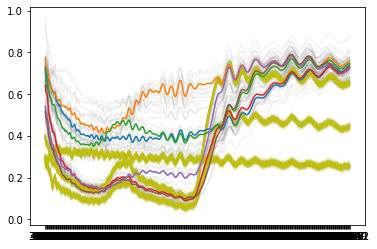

In [12]:
# X.T : pucerons sur feuille ou non avec plusieurs espèces 
#(gris sur le graphe)
_=plt.plot(X.T,"k-", alpha=0.05)

# neg.T : randomisé avec erreur sigma pour chaque longueur d'onde: feuille fève, blé ou lumière seule
# trois trucs dégueu en vert kaka
_=plt.plot(neg.T,"y",alpha=0.03)

# X_species_leave : 6 conditions : 3 Feuille ou non -> 3 espèces :
# trois petites courbes colorées
_=plt.plot(X_species_leave.T)


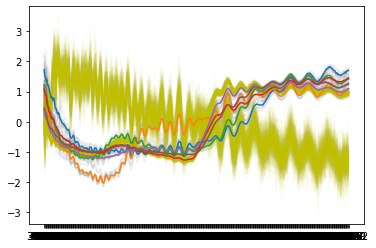

In [13]:
_=plt.plot(X_zscore.T,"k-", alpha=0.05)
_=plt.plot(neg_zscore.T,"y",alpha=0.03)
_=plt.plot(X_species_leave_zscore.T)

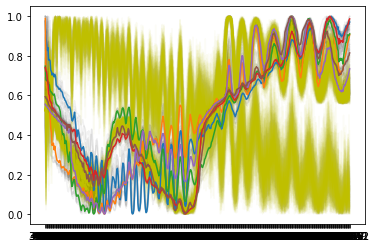

In [14]:
_=plt.plot(X_rank.T,"k-", alpha=0.05)
_=plt.plot(neg_rank.T,"y",alpha=0.03)
_=plt.plot(X_species_leave_rank.T)

In [10]:
X_full = pd.concat((X,neg))
X_full_zscore = pd.concat((X_zscore,neg_zscore))
X_full_rank = pd.concat((X_rank,neg_rank))

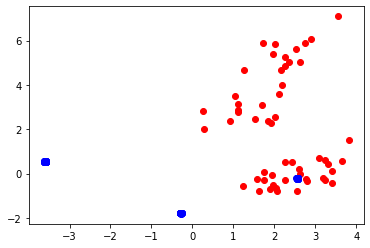

In [11]:
from sklearn.decomposition import PCA
pca = PCA(2)
X_full_pca = pca.fit_transform(X_full)
plt.plot(X_full_pca[:X.shape[0],0],X_full_pca[:X.shape[0],1],"or")
plt.plot(X_full_pca[X.shape[0]:,0],X_full_pca[X.shape[0]:,1],"ob")

In [12]:
np.cumsum(pca.explained_variance_ratio_)

array([0.7209697 , 0.96396319])

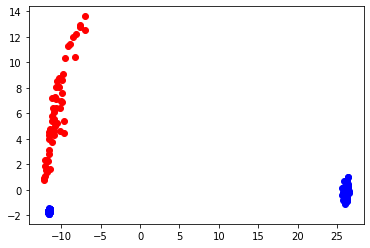

In [13]:
from sklearn.decomposition import PCA
pca = PCA(2)
X_full_pca = pca.fit_transform(X_full_zscore)
plt.plot(X_full_pca[:X.shape[0],0],X_full_pca[:X.shape[0],1],"or")
plt.plot(X_full_pca[X.shape[0]:,0],X_full_pca[X.shape[0]:,1],"ob")

In [14]:
np.cumsum(pca.explained_variance_ratio_)

array([0.88911193, 0.9178201 ])

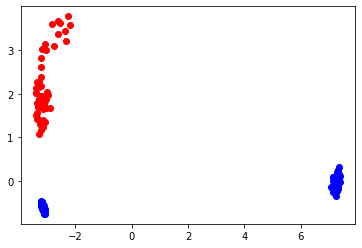

In [15]:
from sklearn.decomposition import PCA
pca = PCA(2)
X_full_pca = pca.fit_transform(X_full_rank)
plt.plot(X_full_pca[:X.shape[0],0],X_full_pca[:X.shape[0],1],"or")
plt.plot(X_full_pca[X.shape[0]:,0],X_full_pca[X.shape[0]:,1],"ob")

In [16]:
np.cumsum(pca.explained_variance_ratio_)

array([0.85358541, 0.89009234])

# Remarques
Aphids spectra are mainly depends on : 1) the aphid is on a leave 2) the species.
Therefore if we take as dataset the average spectra for 3 species of aphids on leaves and on white screen, we should be able to detect an aphid by computing the difference wrt to the dataset

More differences between the negative examples and the aphids appear when no standardization is applied

In [17]:
def best_match(datapoint, library=X_species_leave):
    distance = np.sum(np.abs(library - datapoint),axis=1)
    return(min(distance))

In [18]:
best_match_distance = X_full.apply(best_match,axis=1)

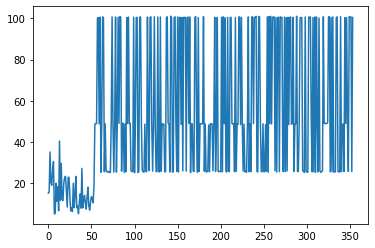

In [19]:
plt.plot(best_match_distance.values)

# Autoencoder

In [32]:
X.min().min(), X.max().max()

(0.06839674514740264, 0.9686257891639752)

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 448)          0                                            
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 448)          201152      input_9[0][0]                    
__________________________________________________________________________________________________
reshape_10 (Reshape)            (None, 448, 1)       0           dense_14[0][0]                   
__________________________________________________________________________________________________
conv1d_13 (Conv1D)              (None, 224, 32)      128         reshape_10[0][0]                 
____________________________________________________________________________________________

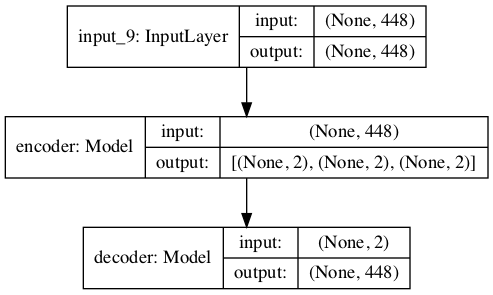

In [65]:
from keras.layers import Input, Dense, Conv1D, Conv2DTranspose,Lambda,Flatten,Reshape
from keras.models import Model
import pandas as pd
import numpy as np
from keras import regularizers
from keras import backend as K
from keras.utils import plot_model


def sampling(args):
    """Reparameterization trick by sampling from an isotropic unit Gaussian.
    # Arguments
        args (tensor): mean and log of variance of Q(z|X)
    # Returns
        z (tensor): sampled latent vector
    """

    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean = 0 and std = 1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon



def Conv1DTranspose(input_tensor, filters, kernel_size, strides=2, padding='same', activation="relu"):
    """
        input_tensor: tensor, with the shape (batch_size, time_steps, dims)
        filters: int, output dimension, i.e. the output tensor will have the shape of (batch_size, time_steps, filters)
        kernel_size: int, size of the convolution kernel
        strides: int, convolution step size
        padding: 'same' | 'valid'
    """
    x = Lambda(lambda x: K.expand_dims(x, axis=2))(input_tensor)
    x = Conv2DTranspose(filters=filters, kernel_size=(kernel_size, 1), strides=(strides, 1), padding=padding,activation=activation)(x)
    x = Lambda(lambda x: K.squeeze(x, axis=2))(x)
    return x


latent_dim = 2 
inputs = Input(shape=(448,))
x = Dense(448, activation='relu')(inputs)
x = Reshape((448,1, ))(x)
filters = 16
kernel_size=3
for i in range(2):
    filters *= 2
    x = Conv1D(filters,
               kernel_size,
               padding='same',
               activation='relu',
               strides=2)(x)
shape = K.int_shape(x)
x = Flatten()(x)
x = Dense(16, activation='relu')(x)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

# use reparameterization trick to push the sampling out as input
# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# instantiate encoder model
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()
plot_model(encoder, to_file='vae_cnn_encoder.png', show_shapes=True)



latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(shape[1] * shape[2], activation='relu')(latent_inputs)
x = Reshape((shape[1], shape[2], ))(x)

for i in range(1):
    x = Conv1DTranspose(input_tensor=x,
                        filters=filters,
                        kernel_size=kernel_size,
                        activation='relu',
                        strides=2,
                        padding='same')
    filters //= 2

outputs = Conv1DTranspose(x,
                          filters=1,
                          kernel_size=kernel_size,
                          activation='sigmoid',
                          padding='same')
outputs = Flatten()(outputs)

# instantiate decoder model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()
plot_model(decoder, to_file='vae_cnn_decoder.png', show_shapes=True)

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae')

plot_model(vae, to_file='vae.png', show_shapes=True)


In [66]:
X = pd.read_csv("average_profile_no_outlier.csv",index_col=[0,1,2])
X = X.iloc[np.random.randint(0,X.shape[0],300),:]
X += np.random.randn(*X.shape)*0.01

neg = pd.read_csv("spectrum_avg_norm.csv",index_col=0).iloc[:3,:]
neg = pd.concat((neg,pd.read_csv("feuille_spectrum_avg_norm.csv",index_col=0)))
neg = neg.iloc[np.random.randint(0,3,300),:]
neg += np.random.randn(*neg.shape)*0.01


X_zscore = zscore(X.T).T
X_species_leave_zscore = zscore(X_species_leave.T).T
neg_zscore = zscore(neg.T).T

X_rank = rank_normalizer(X)
X_species_leave_rank = rank_normalizer(X_species_leave)
neg_rank = rank_normalizer(neg)


from sklearn.model_selection import train_test_split
X_full = pd.concat((neg,X))
y = np.asarray(list(np.zeros(neg.shape[0]))+list(np.ones(X.shape[0])))
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(y)
encoded_Y = enc.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_full, encoded_Y, test_size=0.33, random_state=42)


In [87]:
from keras.losses import mse, binary_crossentropy
reconstruction_loss = mse(K.flatten(inputs), K.flatten(outputs))
reconstruction_loss *= 10*448
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='rmsprop')
vae.summary()
plot_model(vae, to_file='vae_cnn.png', show_shapes=True)
vae.fit(X,
        epochs=1000,
        batch_size=4)        
        

/Users/sergiopeignier/anaconda3/lib/python3.7/site-packages/keras/engine/training_utils.py:819: UserWarning: Output decoder missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to decoder.
  'be expecting any data to be passed to {0}.'.format(name))


Model: "vae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 448)               0         
_________________________________________________________________
encoder (Model)              [(None, 2), (None, 2), (N 322260    
_________________________________________________________________
decoder (Model)              (None, 448)               34049     
Total params: 356,309
Trainable params: 356,309
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
300/300 [==============================] - 3s 10ms/step - loss: 19.4165
Epoch 2/1000
300/300 [==============================] - 1s 4ms/step - loss: 17.6262
Epoch 3/1000
300/300 [==============================] - 1s 4ms/step - loss: 18.0623
Epoch 4/1000
300/300 [==============================] - 1s 4ms/step - loss: 17.7943
Epoch 5/1000
300/300 [============================

300/300 [==============================] - 1s 5ms/step - loss: 14.7432
Epoch 184/1000
300/300 [==============================] - 1s 5ms/step - loss: 15.3375
Epoch 185/1000
300/300 [==============================] - 1s 5ms/step - loss: 15.0431
Epoch 186/1000
300/300 [==============================] - 1s 5ms/step - loss: 14.5869
Epoch 187/1000
300/300 [==============================] - 1s 5ms/step - loss: 14.7892
Epoch 188/1000
300/300 [==============================] - 1s 5ms/step - loss: 15.0350
Epoch 189/1000
300/300 [==============================] - 1s 5ms/step - loss: 15.1106
Epoch 190/1000
300/300 [==============================] - 1s 5ms/step - loss: 14.8953
Epoch 191/1000
300/300 [==============================] - 1s 5ms/step - loss: 14.9247
Epoch 192/1000
300/300 [==============================] - 1s 5ms/step - loss: 14.7349
Epoch 193/1000
300/300 [==============================] - 1s 5ms/step - loss: 15.0836
Epoch 194/1000
300/300 [==============================] - 1s 5ms/step

300/300 [==============================] - 1s 5ms/step - loss: 13.7080
Epoch 374/1000
300/300 [==============================] - 1s 5ms/step - loss: 13.9574
Epoch 375/1000
300/300 [==============================] - 1s 5ms/step - loss: 14.0821
Epoch 376/1000
300/300 [==============================] - 1s 5ms/step - loss: 13.8478
Epoch 377/1000
300/300 [==============================] - 1s 5ms/step - loss: 14.3698
Epoch 378/1000
300/300 [==============================] - 1s 5ms/step - loss: 13.8977
Epoch 379/1000
300/300 [==============================] - 1s 5ms/step - loss: 13.9421
Epoch 380/1000
300/300 [==============================] - 1s 5ms/step - loss: 13.7148
Epoch 381/1000
300/300 [==============================] - 1s 5ms/step - loss: 13.6404
Epoch 382/1000
300/300 [==============================] - 1s 5ms/step - loss: 14.1092
Epoch 383/1000
300/300 [==============================] - 1s 5ms/step - loss: 13.9722
Epoch 384/1000
300/300 [==============================] - 1s 5ms/step

300/300 [==============================] - 1s 5ms/step - loss: 13.6378
Epoch 564/1000
300/300 [==============================] - 1s 5ms/step - loss: 13.0618
Epoch 565/1000
300/300 [==============================] - 1s 5ms/step - loss: 13.9478
Epoch 566/1000
300/300 [==============================] - 1s 5ms/step - loss: 12.9559
Epoch 567/1000
300/300 [==============================] - 1s 5ms/step - loss: 13.1116
Epoch 568/1000
300/300 [==============================] - 1s 5ms/step - loss: 13.0532
Epoch 569/1000
300/300 [==============================] - 1s 5ms/step - loss: 13.8793
Epoch 570/1000
300/300 [==============================] - 1s 5ms/step - loss: 13.6527
Epoch 571/1000
300/300 [==============================] - 1s 5ms/step - loss: 13.5398
Epoch 572/1000
300/300 [==============================] - 1s 5ms/step - loss: 13.5407
Epoch 573/1000
300/300 [==============================] - 1s 5ms/step - loss: 13.6162
Epoch 574/1000
300/300 [==============================] - 1s 5ms/step

300/300 [==============================] - 1s 4ms/step - loss: 13.4420
Epoch 754/1000
300/300 [==============================] - 1s 4ms/step - loss: 13.3657
Epoch 755/1000
300/300 [==============================] - 1s 4ms/step - loss: 12.9414
Epoch 756/1000
300/300 [==============================] - 1s 5ms/step - loss: 13.2760
Epoch 757/1000
300/300 [==============================] - 1s 4ms/step - loss: 13.2593
Epoch 758/1000
300/300 [==============================] - 1s 4ms/step - loss: 13.0913
Epoch 759/1000
300/300 [==============================] - 1s 4ms/step - loss: 13.6120
Epoch 760/1000
300/300 [==============================] - 1s 4ms/step - loss: 13.3238
Epoch 761/1000
300/300 [==============================] - 1s 5ms/step - loss: 13.9260
Epoch 762/1000
300/300 [==============================] - 2s 5ms/step - loss: 13.1480
Epoch 763/1000
300/300 [==============================] - 1s 4ms/step - loss: 13.0464
Epoch 764/1000
300/300 [==============================] - 1s 4ms/step

300/300 [==============================] - 1s 4ms/step - loss: 12.9015
Epoch 944/1000
300/300 [==============================] - 1s 4ms/step - loss: 13.1308
Epoch 945/1000
300/300 [==============================] - 1s 4ms/step - loss: 12.9852
Epoch 946/1000
300/300 [==============================] - 1s 4ms/step - loss: 13.1457
Epoch 947/1000
300/300 [==============================] - 1s 4ms/step - loss: 13.7181
Epoch 948/1000
300/300 [==============================] - 1s 5ms/step - loss: 13.1098
Epoch 949/1000
300/300 [==============================] - 2s 5ms/step - loss: 13.1882
Epoch 950/1000
300/300 [==============================] - 1s 5ms/step - loss: 12.4955
Epoch 951/1000
300/300 [==============================] - 1s 5ms/step - loss: 13.0641
Epoch 952/1000
300/300 [==============================] - 1s 5ms/step - loss: 12.7124
Epoch 953/1000
300/300 [==============================] - 1s 5ms/step - loss: 13.2733
Epoch 954/1000
300/300 [==============================] - 1s 4ms/step

In [10]:
plt.plot(np.log(vae.history.history["loss"]))


NameError: name 'vae' is not defined

In [89]:
model = vae
model_json = model.to_json()
with open("model_vae_1Dconv.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_vae_1Dconv.h5")
print("Saved model to disk")

Saved model to disk


In [90]:
decoded_X = vae.predict(X)
decoded_neg = vae.predict(neg)


(0, 0.3)

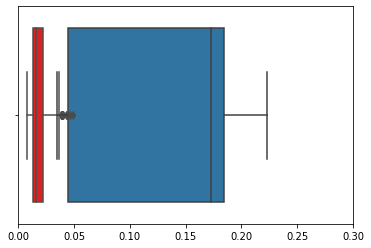

In [91]:
sns.boxplot(np.sqrt(((decoded_X-X)**2)).mean(axis=1),color="red")
sns.boxplot(np.sqrt(((decoded_neg-neg)**2)).mean(axis=1))
plt.xlim(0,0.3)

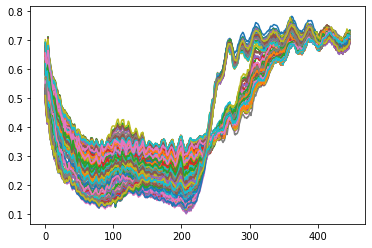

In [92]:
_=plt.plot(decoded_neg.T)


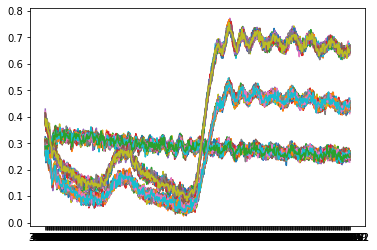

In [93]:
_=plt.plot(neg.T)


(0, 1)

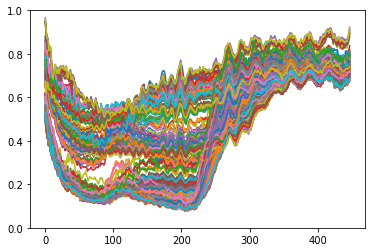

In [94]:
_=plt.plot(decoded_X.T)
plt.ylim([0,1])

(0, 1)

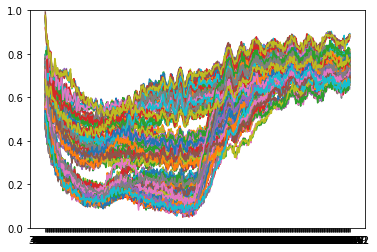

In [95]:
_=plt.plot(X.T)
plt.ylim([0,1])

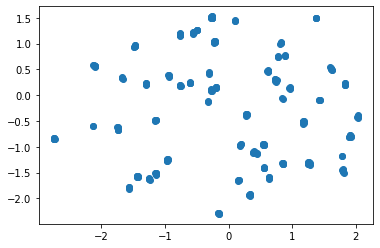

In [96]:
X_enc = encoder.predict(X)[0]
plt.plot(X_enc[:,0],X_enc[:,1],"o")
plt.show()

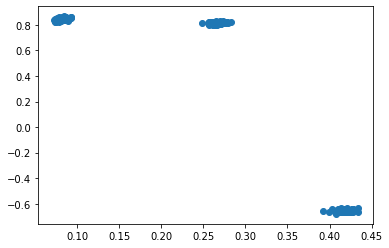

In [97]:
neg_enc = encoder.predict(neg)[0]
plt.plot(neg_enc[:,0],neg_enc[:,1],"o")
plt.show()